<a href="https://colab.research.google.com/github/muu86/ml_study/blob/main/2_%EC%84%A0%ED%98%95_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=77b53601a3cbbb7dcaa5bca3cd4cbd3c6f899f525e04ca110c97c50600876877
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
import mglearn
import numpy as np

w[0]: 0.393906  b: -0.031804


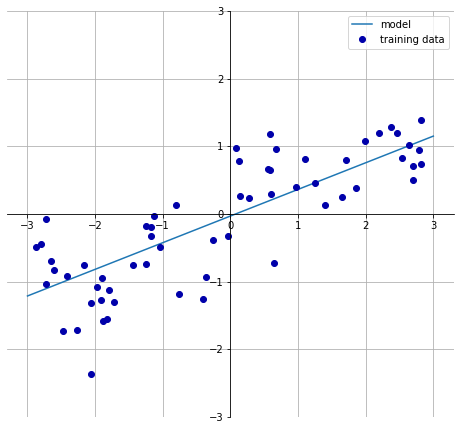

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
X_train.shape, y_train.shape

((45, 1), (45,))

In [6]:
# 선형 회귀 모델이 학습한 가중치와 편향 보기
print("lr의 가중치(weight) : {}".format(lr.coef_))
print("lr의 편향(bias) : {}".format(lr.intercept_))

lr의 가중치(weight) : [0.39390555]
lr의 편향(bias) : -0.031804343026759746


In [7]:
# 훈련 세트와 테스트 세트 점수확인
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


데이터의 특성이 많다면 어떻게 될까요?

In [8]:
# 확장된 boston 주택가격 데이터셋 불러오기
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


In [9]:
X_train.shape

(379, 104)

# 가중치 패널티 ( $\alpha$ )

$\alpha$란 가중치를 억제하는 힘이라고 생각하면 편하다. 즉 $\alpha$가 커질 수록 가중치 $W$는 0에 가깝게 작아진다.

* Ridge 모델
 - $\alpha$가 커지면 가중치($W$)가 0에 가깝게 작아지지만, 실제 0이 되진 않습니다.
* Lasso 모델
 - $\alpha$가 커지면 가중치($W$)가 0에 가까워 지고, 실제 0이 되어버린다.
 - 이러한 특징을 **모델에 의한 특성 선택**이라고 한다.

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("훈련 세트의 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트의 점수 : {:.2f}".format(ridge.score(X_test, y_test)))


훈련 세트의 점수 : 0.89
테스트 세트의 점수 : 0.75


In [15]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
# alpha 값에 따른 릿지 모델 성능 확인

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("alpha = 10 일 때 훈련 세트의 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("alpha = 10 일 때 테스트 세트의 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

alpha = 10 일 때 훈련 세트의 점수 : 0.79
alpha = 10 일 때 테스트 세트의 점수 : 0.64


In [20]:
# alpha 를 0.1 로 설정한 경우
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("alpha = 0.1 일 때 훈련 세트의 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("alpha = 0.1 일 때 테스트 세트의 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

alpha = 0.1 일 때 훈련 세트의 점수 : 0.93
alpha = 0.1 일 때 테스트 세트의 점수 : 0.77


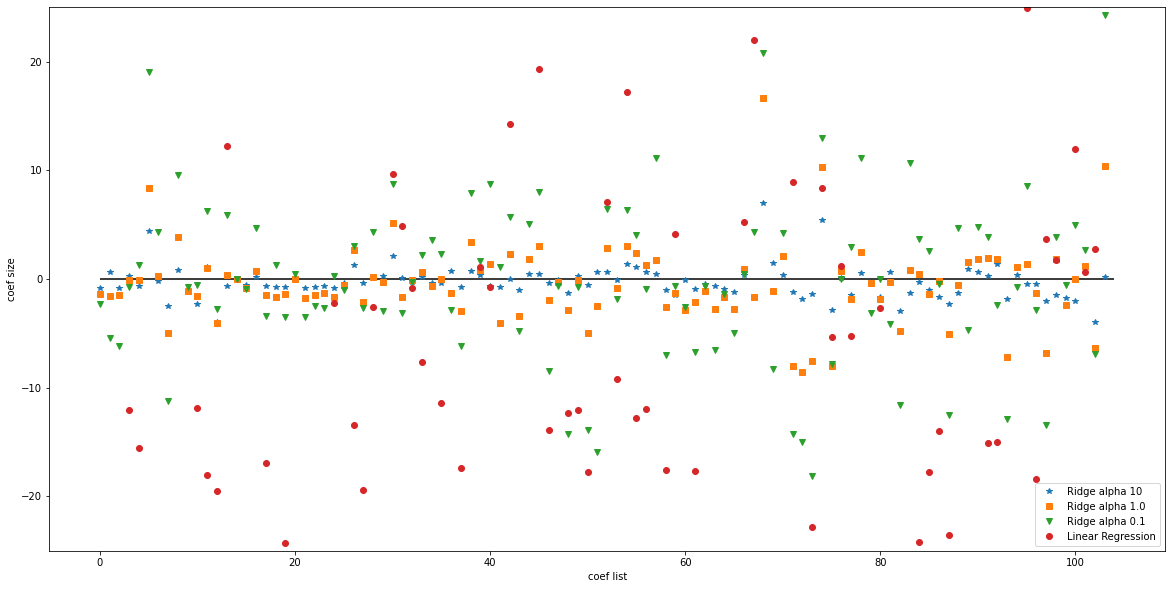

In [23]:
# alpha 값에 따른 각각의 특성에 대한 가중치의 분포도를 확인해보자
# 선형 모델의 coef_ 변수에 가중치 배열이 들어있다
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))

plt.plot(ridge10.coef_, '*', label='Ridge alpha 10')
plt.plot(ridge.coef_, 's', label='Ridge alpha 1.0')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha 0.1')
plt.plot(lr.coef_, 'o', label='Linear Regression')

plt.xlabel('coef list')
plt.ylabel('coef size')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()